In [53]:
#import the basic libraries
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

#import warning
import warnings
warnings.filterwarnings('ignore')



In [2]:
pd.options.display.max_rows= None

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#load all the datasets we have created previously

load_data_inputs_train= pd.read_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_inputs_train.csv', index_col= 0)
load_data_targets_train= pd.read_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_targets_train.csv',index_col= 0)
load_data_inputs_test= pd.read_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_inputs_test.csv', index_col= 0)
load_data_targets_test= pd.read_csv('/content/drive/MyDrive/credit_risk_analysis/Data/loan_data_targets_test.csv', index_col= 0)


In [5]:
#print the head of load_data_targets
load_data_targets_train.head()

,good_bad
403678,1
241492,1
15864,0
320277,1
299829,1


In [6]:
#view the shape of train & test inputs dataframe
display(load_data_inputs_train.shape)
display(load_data_inputs_test.shape)

(373028, 352)

(93257, 352)

In [7]:
#view the shape of train & test targets dataframe
display(load_data_targets_train.shape)
display(load_data_targets_test.shape)

(373028, 1)

(93257, 1)

In [8]:
#create a new column outcome(0 or 1) in load_data_inputs_train
load_data_inputs_train['outcome'] = load_data_targets_train

In [9]:
#check the value_counts of outcome
load_data_inputs_train['outcome'].value_counts()

1    332338
0     40690
Name: outcome, dtype: int64

In [10]:
#check the head of load_data_inputs_train
load_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:30-35,dti:35-40,dti:>40,mths_since_last_record_factor,mths_since_last_record:Missing,mths_since_last_record:0-3,mths_since_last_record:3-85,mths_since_last_record:85-120,mths_since_last_record:>=120,outcome
403678,14560583,16622883,24000,24000,24000.0,60 months,11.99,533.75,B,B3,...,0,0,0,NaN,1,0,0,0,0,1
241492,34303344,36966688,30000,30000,30000.0,60 months,12.39,673.27,C,C1,...,0,0,0,NaN,1,0,0,0,0,1
15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,C2,...,0,0,0,NaN,1,0,0,0,0,0
320277,25326009,27668971,12000,12000,12000.0,36 months,13.98,410.02,C,C3,...,0,0,0,NaN,1,0,0,0,0,1
299829,28633305,31166460,5000,5000,5000.0,36 months,11.67,165.29,B,B4,...,0,0,0,"(79.98, 82.56]",0,0,1,0,0,1


In [11]:
#getting only the default cases where outcome = 0
loan_data_defaults = load_data_inputs_train[load_data_inputs_train['outcome'] == 0]                                                                             #taking only defaults

In [12]:
#check the head of loan_data_defaults
loan_data_defaults.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:30-35,dti:35-40,dti:>40,mths_since_last_record_factor,mths_since_last_record:Missing,mths_since_last_record:0-3,mths_since_last_record:3-85,mths_since_last_record:85-120,mths_since_last_record:>=120,outcome
15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,C2,...,0,0,0,NaN,1,0,0,0,0,0
349448,20682361,22954753,12000,12000,12000.0,60 months,25.57,356.24,F,F5,...,0,0,0,NaN,1,0,0,0,0,0
282491,30735926,33289102,9675,9675,9675.0,36 months,20.99,364.46,E,E4,...,0,0,0,NaN,1,0,0,0,0,0
28769,533057,689005,10000,10000,10000.0,60 months,11.49,219.88,B,B4,...,0,0,0,NaN,1,0,0,0,0,0
435506,12456691,14468816,11200,11200,11200.0,36 months,14.16,383.67,C,C2,...,0,0,0,NaN,1,0,0,0,0,0


In [13]:
#feature selection step where features created in preprocessing steps will be considered(same features we evaluated Probabilty of default model along with recoveries)

feature_selection=['loan_amnt',
                   'funded_amnt',
                   'int_rate',
                   'installment',
                   'recoveries',
                   'total_rec_prncp',
                  'grade:A',
                  'grade:B',
                  'grade:C',
                  'grade:D',
                  'grade:E',
                  'grade:F',
                  'grade:G',
                  'home_ownership:RENT_OTHER_NONE_ANY',
                  'home_ownership:MORTGAGE',
                  'home_ownership:OWN',
                  'verification_status:Not Verified',
                  'verification_status:Source Verified',
                  'verification_status:Verified',
                  'initial_list_status:f',
                  'initial_list_status:w',
                  'addr_state_NE',
                  'addr_state_ME',
                  'addr_state_IA',
                  'addr_state_NV',
                  'addr_state_HI_FL_AL',
                  'addr_state_NY_LA_NM_OK_NC_MO_MD_NJ_VA_CA_AZ_MI_UT_TN_AR_PA_RI_OH_KY_DE_MN_SD_MA_IN_GA',
                  'addr_state_WA_WI_OR_TX_IL_CT_MT_CO_SC',
                  'addr_state_KS_VT_AK_MS_ID_NH_WV',
                  'addr_state_WY',
                  'addr_state_DC',
                  'purpose:educ_sm_b_ren_en_mov_house_other_med',
                  'purpose:vac_wedd_debt_home_imp_major_pur_car_cc',
                  'term:36',
                  'term:60',
                  'emp_length:0',
                  'emp_length:1',
                  'emp_length:2-4',
                  'emp_length:5-6',
                  'emp_length:7-9',
                  'emp_length:10',
                  'mths_since_issued_date:<116',
                  'mths_since_issued_date:116-127',
                  'mths_since_issued_date:127-138',
                  'mths_since_issued_date:138-150',
                  'mths_since_issued_date:150-161',
                  'mths_since_issued_date:161-172',
                  'mths_since_issued_date:172-183',
                  'mths_since_issued_date:>183',
                  'int_rate:<9.548',
                  'int_rate:9.548-12.85',
                  'int_rate:12.85-15.74',
                  'int_rate:15.74-20.281',
                  'int_rate:20.281',
                  'mths_since_earliest_cr_line:<140',
                  'mths_since_earliest_cr_line:140-239',
                  'mths_since_earliest_cr_line:240-339',
                  'mths_since_earliest_cr_line:340-439',
                  'mths_since_earliest_cr_line:440-539',
                  'mths_since_earliest_cr_line:540-600',
                  'mths_since_earliest_cr_line:>600',
                  #'installment<963.808',
                  #'installment>=963.808',
                  'delinq_2yrs:0',
                  'delinq_2yrs:0-5',
                  'delinq_2yrs:5-7',
                  'delinq_2yrs:7-9',
                  'delinq_2yrs:9-11',
                  'delinq_2yrs:11-12',
                  'delinq_2yrs:12-18',
                  'delinq_2yrs:>18',
                  'inq_last_6mths:0',
                  'inq_last_6mths:0-4',
                  'inq_last_6mths:4-6',
                  'inq_last_6mths:6-9',
                  'inq_last_6mths:9-11',
                  'inq_last_6mths:11-13',
                  'inq_last_6mths:>13',
                  'open_acc:=0',
                  'open_acc:0-4',
                  'open_acc:4-26',
                  'open_acc:26-28',
                  'open_acc:28-33',
                  'open_acc:33-39',
                  'open_acc:>39',
                  'pub_rec:0-6',
                  'pub_rec:6-9',
                  'pub_rec:9-10',
                  'pub_rec>10',
                  'total_acc:<=0.0-3.12',
                  'total_acc:3.12-15.6',
                  'total_acc:15.6-49.92',
                  'total_acc:49.92-65.52',
                  'total_acc:65.52-81.12',
                  'total_acc:81.12-99.84',
                  'total_acc:>99.84',
                  'acc_now_delinq:0-1',
                  'acc_now_delinq:1-2',
                  'acc_now_delinq:2-3',
                  'acc_now_delinq:>3',
                  'total_rev_hi_lim:<6.4k',
                  'total_rev_hi_lim:6.4k_12.8k',
                  'total_rev_hi_lim:12.8k_20.8k',
                  'total_rev_hi_lim:20.8k_30.4k',
                  'total_rev_hi_lim:30.4k_35.2k',
                  'total_rev_hi_lim:35.2k_46.4k',
                  'total_rev_hi_lim:46.4k_56k',
                  'total_rev_hi_lim:56k_70.4k',
                  'total_rev_hi_lim:70.4k_78.4k',
                  'total_rev_hi_lim:>78.4k',
                  'annual_inc:<8k',
                  'annual_inc:8k-30k',
                  'annual_inc:30k-40k',
                  'annual_inc:40k-50k',
                  'annual_inc:50k-60k',
                  'annual_inc:60k-70k',
                  'annual_inc:70k-80k',
                  'annual_inc:80k-90k',
                  'annual_inc:90k-100k',
                  'annual_inc:100k-120k',
                  'annual_inc:120k-140k',
                  'annual_inc:>140k',
                  'mths_since_last_delinq:Missing',
                  'mths_since_last_delinq:0-3',
                  'mths_since_last_delinq:3-80',
                  'mths_since_last_delinq:80-90',
                  'mths_since_last_delinq:90-105',
                  'mths_since_last_delinq:105-116',
                  'mths_since_last_delinq:>=116',
                  'dti:<2',
                  'dti:2-4',
                  'dti:4-10',
                  'dti:10-15',
                  'dti:15-20',
                  'dti:20-25',
                  'dti:25-30',
                  'dti:30-35',
                  'dti:35-40',
                  'dti:>40',
                  'mths_since_last_record:Missing',
                  'mths_since_last_record:0-3',
                  'mths_since_last_record:3-85',
                  'mths_since_last_record:85-120',
                  'mths_since_last_record:>=120']



In [14]:
#assign them into a inputs_train_with_ref_category with only those columns which are in the list(fetaure selection)
loan_data_defaults = loan_data_defaults.reindex(feature_selection, axis='columns')

In [15]:
#check for null values in every feature selected in loan_data_defaults dataset
loan_data_defaults.isna().sum()

loan_amnt                                                                                0
funded_amnt                                                                              0
int_rate                                                                                 0
installment                                                                              0
recoveries                                                                               0
total_rec_prncp                                                                          0
grade:A                                                                                  0
grade:B                                                                                  0
grade:C                                                                                  0
grade:D                                                                                  0
grade:E                                                                                  0

### Recovery Rate:
It is the recovered amount divided by the funded amount

In [16]:
#evaluation of recovery_rate i.e 'recoveries'/'funded_amnt'
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries']/loan_data_defaults['funded_amnt']

In [17]:
#check the statistics of recovery_rate
loan_data_defaults['recovery_rate'].describe()                                                                             #recovery rate has to be from 0 to 1

count    40690.000000
mean         0.051499
std          0.085709
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101377
max          1.220774
Name: recovery_rate, dtype: float64

In [18]:
#convert recovery rate in the range of 0 to 1
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1,1,loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0,0,loan_data_defaults['recovery_rate'])

In [19]:
#recovery rate 0 to 1
loan_data_defaults['recovery_rate'].describe()


count    40690.000000
mean         0.051466
std          0.085320
min          0.000000
25%          0.000000
50%          0.000000
75%          0.101377
max          1.000000
Name: recovery_rate, dtype: float64

### The credit conversion factor (CCF) converts the amount of a free credit line and other off-balance-sheet transactions (with the exception of derivatives) to an EAD (exposure at default) amount.

In [20]:
#credit conversion factor(CCF)
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

In [21]:
#CCF has to be in the range of 0 to 1
loan_data_defaults['CCF'].describe()

count    40690.000000
mean         0.718738
std          0.204771
min          0.000000
25%          0.607902
50%          0.769078
75%          0.875763
max          1.000000
Name: CCF, dtype: float64

In [22]:
#set  seaborn
sns.set()

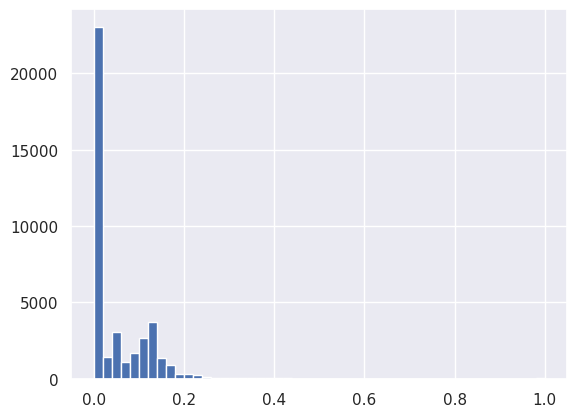

In [23]:
#plot a histogram of recovery_rate with bins=50
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
plt.show()

most of the records are concentrated at 0 recovery rate and only few records rae greater than 0

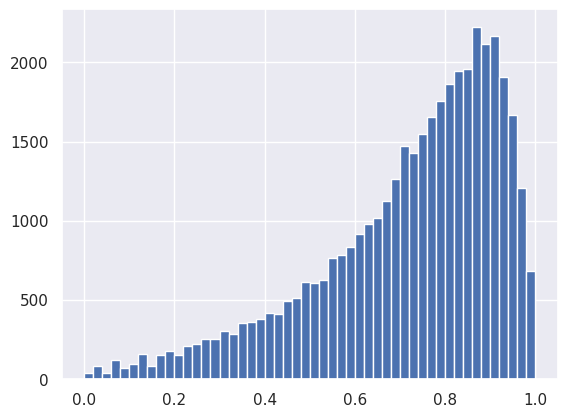

In [24]:
#plot a histogram of CCF with 50 bins
plt.hist(loan_data_defaults['CCF'], bins = 50)
plt.show()


In [25]:
#cronverting recovery_rate column into binary column recovery_rate_0_1 where if the recovery_rate is 0 then insert 0 and 1 if it is greater than 0
loan_data_defaults['recovery_rate_0_1']  = np.where(loan_data_defaults['recovery_rate'] == 0,0,1)

In [26]:
#value_counts of recovery_rate_0_1
loan_data_defaults['recovery_rate_0_1'].value_counts()

0    21329
1    19361
Name: recovery_rate_0_1, dtype: int64

# LGD_Model

In LGD(Loss Given Default) model we will basically create 2 models for determining the recovery rate if the recovery rate is 0 or greater than 0:

1.we will create a logistic regression model for determining whether the recovery rate is 0 or 1.

2.For all the recovery rate greater than 0 we will create a linear regression model to determine how much greater than 0 the value of recovery rate is.

#### Step_1: creating a logistic regression model for determining whether the recovery rate is 0 or 1

In [27]:
#check the column name of loan_data_defaults
loan_data_defaults.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'recoveries',
       'total_rec_prncp', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       ...
       'dti:35-40', 'dti:>40', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-3', 'mths_since_last_record:3-85',
       'mths_since_last_record:85-120', 'mths_since_last_record:>=120',
       'recovery_rate', 'CCF', 'recovery_rate_0_1'],
      dtype='object', length=145)

In [28]:
#Train Test split of loan_data_defaults
lgd_X_train,lgd_X_test,lgd_y_train,lgd_y_test = train_test_split(loan_data_defaults.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['recovery_rate_0_1'],test_size=0.2,random_state=42)

In [29]:
#create a list of reference category column selecting only one column from each parent column
ref_category_col = ['grade:G',
               'home_ownership:RENT_OTHER_NONE_ANY',
               'addr_state_NE',
               'verification_status:Verified',
                'purpose:educ_sm_b_ren_en_mov_house_other_med',
                'initial_list_status:f',
                'term:60',
                'emp_length:0',
                'mths_since_issued_date:<116',
                'int_rate:20.281',
                'mths_since_earliest_cr_line:<140',
                'delinq_2yrs:>18',
                'inq_last_6mths:0',
                'open_acc:=0',
                'pub_rec:0-6',
                'total_acc:>99.84',
                'acc_now_delinq:>3',
                'total_rev_hi_lim:<6.4k',
                'annual_inc:<8k',
                'dti:<2',
                'mths_since_last_delinq:Missing',
                'mths_since_last_record:Missing',
               ]

In [30]:
#drop the reference categories from lgd_X_train
lgd_X_train = lgd_X_train.drop(ref_category_col, axis = 1)

In [31]:
#drop the reference categories from lgd_X_test
lgd_X_test = lgd_X_test.drop(ref_category_col, axis = 1)

In [32]:
#create an object of logistic regression with max_iter=200
lr_model = LogisticRegression()

In [33]:
#check the shape of lgd_X_train
lgd_X_train.shape

(32552, 119)

In [34]:
#check the shape of lgd_y_train
lgd_y_train.shape

(32552,)

In [35]:
#fit the logistic reg model on lgd_inputs_train and lgd_target_train
lr_model.fit(lgd_X_train,lgd_y_train)

LogisticRegression()

In [36]:
#check the shape of lgd_X_test
lgd_X_test.shape

(8138, 119)

In [37]:
#predict the results of lgd_X_test
pred = lr_model.predict(lgd_X_test)

In [38]:
#predict the probabilities for 0 & 1, then extract the probabilities for 1
prob_pred = lr_model.predict_proba(lgd_X_test)[:,1]


In [39]:
#create an empty dataframe that will store the final results
df_actual_predicted_probs = pd.DataFrame()

In [40]:
#create 2 columns one will store the pred and other will store the prob_pred
df_actual_predicted_probs['lgd_test_outcome'] = pred
df_actual_predicted_probs['lgd_test_proba'] = prob_pred

In [41]:
#check the head of the dataframe
df_actual_predicted_probs.head(10)

,lgd_test_outcome,lgd_test_proba
0,1,0.746433
1,1,0.582774
2,0,0.400965
3,1,0.662660
4,1,0.718913
5,0,0.189261
6,0,0.256917
7,1,0.742276
8,1,0.578541
9,1,0.646585


In [42]:
#check the shape of df_actual_predicted_probs
df_actual_predicted_probs.shape

(8138, 2)

In [43]:
#print the confusion matrix using lgd_target_test and pred
pd.crosstab(lgd_y_test, pred, rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,2907,1292
1,1591,2348


In [44]:
metrics.confusion_matrix(lgd_y_test,df_actual_predicted_probs['lgd_test_outcome'])

array([[2907, 1292],
       [1591, 2348]])

In [45]:
#accuracy of model
metrics.accuracy_score(lgd_y_test, pred)

0.6457360530842959

In [46]:
#save the reg model
pickle.dump(lr_model,open('lgd_model.sav','wb'))

stage-2...where >0 linear reg to determine how much >0   for recovery rate

Stage_2:Take those records where recovery_rate_0_1 is 1 and determine the recovery_rate by Linear REG

In [51]:
#take all records from loan_data_defaults where recovery_rate_0_1 is 1
loan_data_1 = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [52]:
#check the shape of loan_data_1
loan_data_1.shape

(19361, 145)

In [63]:
#train test split
lgd_X_train_1,lgd_X_test_1,lgd_y_train_1,lgd_y_test_1 = train_test_split(loan_data_1.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),loan_data_1['recovery_rate'],test_size=0.2,random_state=1)

In [71]:
lgd_y_test_1.head(10)

134512    0.126216
218197    0.097383
14907     0.047393
111463    0.108825
2883      0.004528
184959    0.057848
1765      0.655525
417166    0.315945
109432    0.114658
253267    0.169493
Name: recovery_rate, dtype: float64

In [94]:
#drop the refrence categories from lgd_input_train_2
lgd_X_train_1 = lgd_X_train_1.drop(ref_category_col, axis = 1)

pandas.core.frame.DataFrame

In [65]:
#drop the refrence categories from lgd_input_test
lgd_X_test_1 = lgd_X_test_1.drop(ref_category_col, axis = 1)

In [66]:
#check the shape of train & test dataset
display(lgd_X_train_1.shape)
display(lgd_X_test_1.shape)

(15488, 119)

(3873, 119)

In [67]:
#create an object  of linear regression
lin_reg = LinearRegression()

In [68]:
#fit the lin_reg on lgd_X_train_1,lgd_y_train_1
lin_reg.fit(lgd_X_train_1,lgd_y_train_1)

LinearRegression()

In [69]:
#predict the results
pred_lin = lin_reg.predict(lgd_X_test_1)

In [70]:
#check the predicted results
pred_lin

array([0.11716497, 0.08414165, 0.08778261, ..., 0.037678  , 0.06252613,
       0.13603351])

In [72]:
#r2_score
metrics.r2_score(lgd_y_test_1, pred_lin)

0.12312332617688282

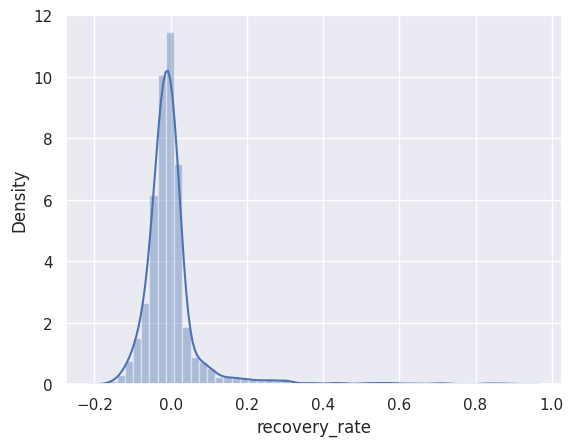

In [81]:
#plot the distribution plot for lgd_target_test_2-pred_lin
sns.distplot(lgd_y_test_1-pred_lin)

plt.show()

In [82]:
#save the model using pickle
pickle.dump(lin_reg,open('lgd_stage_2.sav','wb'))

# combination of stage1 and stage2

we will multiply the results of stage_1 and stage_2

In [83]:
#predict the results of stage_1 test i.e lgd_X_test using the ln_reg method
pred_stage_2_all = lin_reg.predict(lgd_X_test)

In [84]:
#print the pred_stage_2_all
pred_stage_2_all

array([0.08706991, 0.16170824, 0.11781455, ..., 0.09673476, 0.12492286,
       0.11432704])

In [85]:
#make sure that the length of pred and pred_stage_2_all is same becoz we will combine the results by multiplying them
print(len(pred),len(pred_stage_2_all))

8138 8138


In [86]:
#multiply the stage_1 and stage_2 results
pred_lgd_final = pred * pred_stage_2_all

In [87]:
#print the pred_lgd_final
pred_lgd_final

array([0.08706991, 0.16170824, 0.        , ..., 0.09673476, 0.        ,
       0.        ])

In [88]:
#check the basic stats of pred_lgd_final
pd.DataFrame(pred_lgd_final).describe()

,0
count,8138.000000
mean,0.047408
std,0.056693
min,0.000000
25%,0.000000
50%,0.000000
75%,0.098950
max,0.279216


# EAD MODEL

In [89]:
#check the columns of loan_data_defaults
loan_data_defaults.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'recoveries',
       'total_rec_prncp', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       ...
       'dti:35-40', 'dti:>40', 'mths_since_last_record:Missing',
       'mths_since_last_record:0-3', 'mths_since_last_record:3-85',
       'mths_since_last_record:85-120', 'mths_since_last_record:>=120',
       'recovery_rate', 'CCF', 'recovery_rate_0_1'],
      dtype='object', length=145)

In [96]:
#Train test split using the CCF as output feature
ead_X_train, ead_X_test, ead_y_train, ead_y_test = train_test_split(loan_data_defaults.drop(['recoveries','recovery_rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['CCF'],test_size=0.2,random_state=1)

In [97]:
#drop the refrence categories
ead_X_train= ead_X_train.drop(ref_category_col, axis = 1)

In [98]:
#drop the refrence categories from ead_X_test
ead_X_test = ead_X_test.drop(ref_category_col, axis = 1)

In [99]:
#create linear regression object and fit it on ead_X_train,ead_y_train
reg_ead = LinearRegression()
reg_ead.fit(ead_X_train,ead_y_train)

LinearRegression()

In [100]:
#predict the results of ead_inputs_test
y_pred_test_ead =reg_ead.predict(ead_X_test)

In [101]:
#print the results
y_pred_test_ead

array([0.79098273, 0.68424087, 0.74974949, ..., 0.70980991, 0.70798213,
       0.74629837])

<Axes: xlabel='CCF', ylabel='Density'>

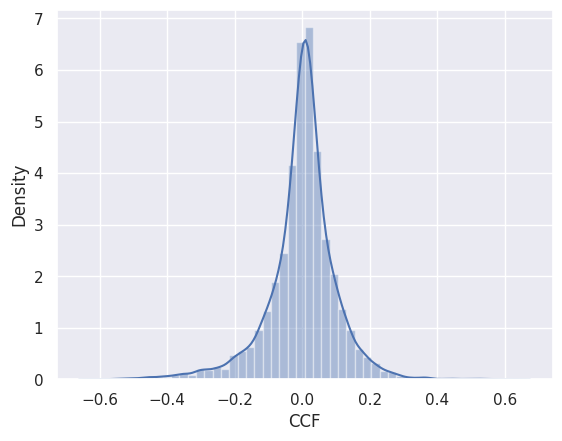

In [102]:
#plot the distribution plot of ead_targets_test-y_pred_test_ead
sns.distplot(ead_y_test-y_pred_test_ead)

In [103]:
#chekc the basic stats of y_pred_test_ead
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8138.000000
mean,0.719685
std,0.178817
min,-0.545071
25%,0.630831
50%,0.728718
75%,0.836255
max,1.259043


We see that some values are negitive and this predicted value is of CCF...so it can't be negitive

In [105]:
#replace all the negitive values with 0 and all values which are greater than 1 with 1
y_pred_test_ead = np.where(y_pred_test_ead < 0,0,y_pred_test_ead)
y_pred_test_ead = np.where(y_pred_test_ead > 1,1,y_pred_test_ead)

In [106]:
#save the EAD model
pickle.dump(reg_ead,open('ead_model.sav','wb'))

In [107]:
#now again check the basic stats of y_pred_test_ead
pd.DataFrame(y_pred_test_ead).describe()

,0
count,8138.000000
mean,0.718231
std,0.171187
min,0.000000
25%,0.630831
50%,0.728718
75%,0.836255
max,1.000000


# Calculating EL:

### Expected Loss = PD * LGD * EAD

In [108]:
#check the shape of lgd_X_test
lgd_X_test.shape

(8138, 119)

In [109]:
#check the shape of lgd_y_test
lgd_y_test.shape

(8138,)

In [110]:
#Take a testing sample as lgd_input_test and predict the EXPECTED LOSS
testing_sample = lgd_X_test

In [111]:
#check the shape of testing_sample
testing_sample.shape

(8138, 119)

In [112]:
#create an empty dataframe that will store the final results
testing_outcome = pd.DataFrame()

In [114]:
#create columns for prediction of LGD_stage_1 and LGD_stage_2
testing_outcome['recovery_rate_stage_1'] = lr_model.predict(testing_sample)
testing_outcome['recovery_rate_stage_2'] = lin_reg.predict(testing_sample)

In [116]:
#create a new column recovery_rate that will have the fianl results of LGD_Model i.e the combition of stage_1 and stage_2
testing_outcome['recovery_rate'] = testing_outcome['recovery_rate_stage_1'] * testing_outcome['recovery_rate_stage_2']

In [117]:
#check the head of testing_outcome
testing_outcome.head(10)

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate
0,1,0.087070,0.087070
1,1,0.161708,0.161708
2,0,0.117815,0.000000
3,1,0.156764,0.156764
4,1,0.080229,0.080229
5,0,0.121320,0.000000
6,0,0.073089,0.000000
7,1,0.129711,0.129711
8,1,0.064100,0.064100
9,1,0.088237,0.088237


In [124]:
#replace all the negitive values in recovery_rate with 0 and all values which are greater than 1 with 1
# testing_outcome['recovery_rate'] =
testing_outcome['recovery_rate'].describe()

count    8138.000000
mean        0.047408
std         0.056693
min         0.000000
25%         0.000000
50%         0.000000
75%         0.098950
max         0.279216
Name: recovery_rate, dtype: float64

In [120]:
#create a new column LGD in testing_outcome i.e (1-recovery_rate)
testing_outcome['LGD'] = 1 - testing_outcome['recovery_rate']
testing_outcome.head(10)

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD
0,1,0.087070,0.087070,0.912930
1,1,0.161708,0.161708,0.838292
2,0,0.117815,0.000000,1.000000
3,1,0.156764,0.156764,0.843236
4,1,0.080229,0.080229,0.919771
5,0,0.121320,0.000000,1.000000
6,0,0.073089,0.000000,1.000000
7,1,0.129711,0.129711,0.870289
8,1,0.064100,0.064100,0.935900
9,1,0.088237,0.088237,0.911763


In [123]:
#check the basic stats of LGD
testing_outcome.describe()

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD
count,8138.000000,8138.000000,8138.000000,8138.000000
mean,0.447284,0.115445,0.047408,0.952592
std,0.497244,0.034075,0.056693,0.056693
min,0.000000,-0.030516,0.000000,0.720784
25%,0.000000,0.091120,0.000000,0.901050
50%,0.000000,0.120407,0.000000,1.000000
75%,1.000000,0.140909,0.098950,1.000000
max,1.000000,0.297701,0.279216,1.000000


In [125]:
#create a new column CCF that will store the predicted results of EAD_Model
testing_outcome['CCF'] = reg_ead.predict(testing_sample)

In [126]:
#check the basic stats of CCF
testing_outcome['CCF'].describe()

count    8138.000000
mean        0.719688
std         0.175872
min        -0.542444
25%         0.636607
50%         0.730984
75%         0.834634
max         1.244123
Name: CCF, dtype: float64

In [127]:
#replace all the negitive values in CCF with 0 and all values which are greater than 1 with 1
testing_outcome['CCF'] = np.where(testing_outcome['CCF'] < 0,0,testing_outcome['CCF'])
testing_outcome['CCF'] = np.where(testing_outcome['CCF'] > 1,1,testing_outcome['CCF'])

In [128]:
#check the basic stats of CCF
testing_outcome['CCF'].describe()

count    8138.000000
mean        0.718440
std         0.168121
min         0.000000
25%         0.636607
50%         0.730984
75%         0.834634
max         1.000000
Name: CCF, dtype: float64

In [129]:
#check the shape of testing_outcome
testing_outcome.shape

(8138, 5)

In [130]:
#check the shape of testing_sample
testing_sample.shape

(8138, 119)

In [132]:
#create a new column EAD i.e (CCF * funded_amt)
testing_outcome['EAD'] = testing_outcome['CCF'] * testing_sample['funded_amnt'].values

In [133]:
#check the head of testing_outcome
testing_outcome.head(10)

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD
0,1,0.087070,0.087070,0.912930,0.835895,16717.893812
1,1,0.161708,0.161708,0.838292,0.911426,21874.230520
2,0,0.117815,0.000000,1.000000,0.713977,12851.586572
3,1,0.156764,0.156764,0.843236,0.880876,9469.422094
4,1,0.080229,0.080229,0.919771,0.702601,3513.003677
5,0,0.121320,0.000000,1.000000,0.589197,10605.547953
6,0,0.073089,0.000000,1.000000,0.336655,4713.167868
7,1,0.129711,0.129711,0.870289,0.911554,17866.467023
8,1,0.064100,0.064100,0.935900,0.608386,2190.188799
9,1,0.088237,0.088237,0.911763,0.824622,13193.944033


In [134]:
#check the basic stats of EAD
testing_outcome['EAD'].describe()

count     8138.000000
mean     10694.303210
std       7562.239560
min          0.000000
25%       4956.812034
50%       8607.170310
75%      14661.956541
max      35000.000000
Name: EAD, dtype: float64

## Calculate results of PD_Model

In [136]:
#check the columns of testing_sample
testing_sample.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment',
       'total_rec_prncp', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E',
       ...
       'dti:15-20', 'dti:20-25', 'dti:25-30', 'dti:30-35', 'dti:35-40',
       'dti:>40', 'mths_since_last_record:0-3', 'mths_since_last_record:3-85',
       'mths_since_last_record:85-120', 'mths_since_last_record:>=120'],
      dtype='object', length=119)

### Make sure you pass only those columns to the PD_Model which you have passed in PD_Model while model training

In [137]:
#Drop total_rec_prncp column as it was not used in PD_Model while model training
testing_sample.drop('total_rec_prncp',axis=1,inplace=True)

In [141]:
#load the PD_model which we have created Earlier
reg_pd = pickle.load(open('/content/drive/MyDrive/credit_risk_analysis/Data/pd_model_gradient.sav','rb'))

In [145]:
#predict the predict_proba results of testing_sample using PD_Model and store it in 'PD'
testing_outcome['PD'] = reg_pd.predict_proba(testing_sample)[:,0]

In [146]:
#check the head of testing_outcome
testing_outcome.head(10)

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD
0,1,0.087070,0.087070,0.912930,0.835895,16717.893812,0.094445
1,1,0.161708,0.161708,0.838292,0.911426,21874.230520,0.134075
2,0,0.117815,0.000000,1.000000,0.713977,12851.586572,0.127447
3,1,0.156764,0.156764,0.843236,0.880876,9469.422094,0.134075
4,1,0.080229,0.080229,0.919771,0.702601,3513.003677,0.102034
5,0,0.121320,0.000000,1.000000,0.589197,10605.547953,0.094445
6,0,0.073089,0.000000,1.000000,0.336655,4713.167868,0.094445
7,1,0.129711,0.129711,0.870289,0.911554,17866.467023,0.134075
8,1,0.064100,0.064100,0.935900,0.608386,2190.188799,0.094445
9,1,0.088237,0.088237,0.911763,0.824622,13193.944033,0.134075


In [147]:
#check the basic stats of PD
testing_outcome['PD'].describe()

count    8138.000000
mean        0.116818
std         0.016595
min         0.094445
25%         0.102034
50%         0.112794
75%         0.134075
max         0.134075
Name: PD, dtype: float64

In [148]:
#create a new column 'EL' i.e Expected_Loss by ('PD' * 'LGD' * 'EAD')
testing_outcome['EL'] =testing_outcome['PD'] * testing_outcome['LGD'] * testing_outcome['EAD']

In [150]:
#Add the column 'funded_amnt' from testing_sample to testing_outcome
testing_outcome['Funded_amt'] = testing_sample['funded_amnt'].values

In [151]:
#check the head of testing_outcome
testing_outcome.head(10)

,recovery_rate_stage_1,recovery_rate_stage_2,recovery_rate,LGD,CCF,EAD,PD,EL,Funded_amt
0,1,0.087070,0.087070,0.912930,0.835895,16717.893812,0.094445,1441.446909,20000
1,1,0.161708,0.161708,0.838292,0.911426,21874.230520,0.134075,2458.527205,24000
2,0,0.117815,0.000000,1.000000,0.713977,12851.586572,0.127447,1637.892447,18000
3,1,0.156764,0.156764,0.843236,0.880876,9469.422094,0.134075,1070.581122,10750
4,1,0.080229,0.080229,0.919771,0.702601,3513.003677,0.102034,329.689720,5000
5,0,0.121320,0.000000,1.000000,0.589197,10605.547953,0.094445,1001.642346,18000
6,0,0.073089,0.000000,1.000000,0.336655,4713.167868,0.094445,445.135748,14000
7,1,0.129711,0.129711,0.870289,0.911554,17866.467023,0.134075,2084.726183,19600
8,1,0.064100,0.064100,0.935900,0.608386,2190.188799,0.094445,193.593427,3600
9,1,0.088237,0.088237,0.911763,0.824622,13193.944033,0.134075,1612.885746,16000


In [153]:
#create a new dataframe which will have only 'Funded_amt','PD','LGD','EAD','EL'
testing_outcome_final = testing_outcome[['Funded_amt','PD','LGD','EAD','EL']]


## Calculation of verall expected_loss suffered by the bank

In [154]:
#Divide the  expected_loss sum by funded_amnt sum
testing_outcome_final['EL'].sum()/testing_outcome_final['Funded_amt'].sum()

0.08332660952876192

It is observed that overall the Bank suffers an Expected loss of 8.3% while giving loans to it's customers